# Setup

In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Q3

## Part A

Complete the implementation for the following function using basic operations only.
Note that the point of this problem is for you to understand how convolution works. We don't care about optimality.

In [3]:
def filter_2d(image, kernel):
    """
    Convolves an image with the kernel, applying zero-padding to maintain the size of the image.

    Parameters
    ----------
    image: ndarray
        2D array, representing a grayscale image.
    kernel: ndarray
        2D array, representing a linear kernel.
    Returns
    -------
    ndarray
        The result of convolving `image` with `kernel`.
    """
    result = np.zeros(image.shape)
    
    def check_inside(x: int, y: int, width: int, height: int):
        return width > x >= 0 and height > y >= 0
    
    # Without loss of generality we consider kernel sizes are odd numbers
    a = (kernel.shape[1] - 1) // 2
    b = (kernel.shape[0] - 1) // 2
    width = image.shape[1] # x axis
    height = image.shape[0] # y axis
    
    for y in range(height):
        for x in range(width):
            
            for s in range(-a, a + 1): # x axis
                for t in range(-b, b + 1): # y axis
                    image_value = image[y - t][x - s] if check_inside(x - s, y - t, width, height) else 0 # zero padding
                    result[y][x] += kernel[t + b][s + a] * image_value
    return np.rint(result).astype(np.int32)

## Part B

Complete the implementation for the following function.

In [4]:
def averaging_kernel(size):
    """
    Returns an averaging kernel with the specified size.

    Parameters
    ----------
    size: int
        Width and height of the kernel.

    Returns
    -------
    ndarray
        The averaging kernel.
    """
    result = np.ones((size, size))
    
    result /= size * size

    return result

Using the function you have just defined, try to smooth out the noise in the following image.
Try out various window sizes and analyze the results.

(-0.5, 224.5, 224.5, -0.5)

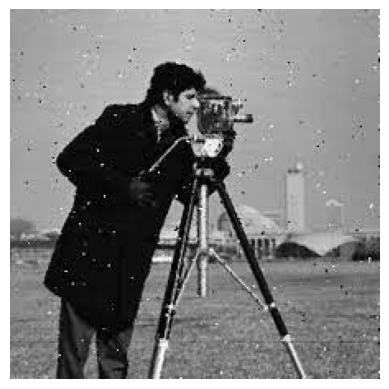

In [9]:
im = cv2.imread('images/Q3/salt_and_pepper_low.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

(-0.5, 224.5, 224.5, -0.5)

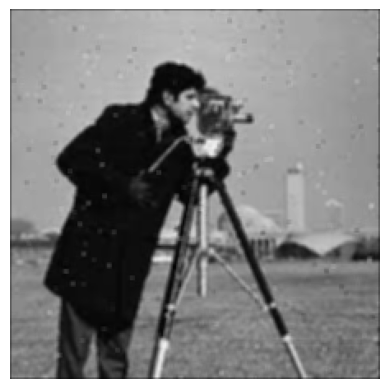

In [44]:
kernel = averaging_kernel(3)
im_smoothed = filter_2d(im, kernel)
plt.imshow(im_smoothed, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

## Part C

An averaging filter isn't enough for the next image you have to deal with. Instead, modify your implementation for `filter_2d` to instead calculate the non-linear **median** filter and try to smooth out this image.
You are encouraged to try out different kernel sizes.

In [11]:
def median_filter(image, size):
    """
    Applies the median filter to the image with the given window size.

    Parameters
    ----------
    image: ndarray
        2D array, representing a grayscale image.
    size: int
        Size of the window for median calculation.
    Returns
    -------
    ndarray
        The result of convolving `image` with `kernel`.
    """
    result = np.zeros(image.shape)
    
    def check_inside(x: int, y: int, width: int, height: int):
        return width > x >= 0 and height > y >= 0    
    
    # Without loss of generality we consider sizes are odd numbers
    a = (size - 1) // 2
    b = (size - 1) // 2
    width = image.shape[1] # x axis
    height = image.shape[0] # y axis
    
    for y in range(height):
        for x in range(width):
            values = []
            for s in range(-a, a + 1): # x axis
                for t in range(-b, b + 1): # y axis
                    if not check_inside(x - s, y - t, width, height):
                        continue
                    values.append(image[y - t][x - s])
            result[y][x] = sorted(values)[len(values) // 2]
    return result

(-0.5, 224.5, 224.5, -0.5)

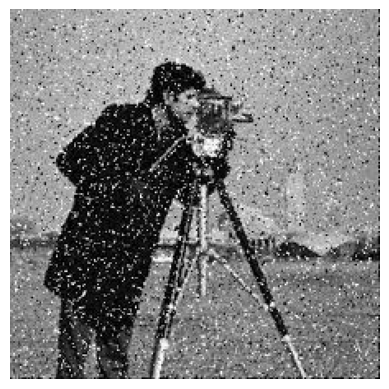

In [12]:
im = cv2.imread('images/Q3/salt_and_pepper_high.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

[[161. 161. 161. ... 159. 153. 153.]
 [159. 159. 153. ... 153. 147. 147.]
 [161. 161. 153. ... 156. 155. 155.]
 ...
 [143. 129. 129. ... 134. 128. 123.]
 [129. 129. 129. ... 123.  30.  30.]
 [129. 147. 147. ... 113.  30.  30.]]


(-0.5, 224.5, 224.5, -0.5)

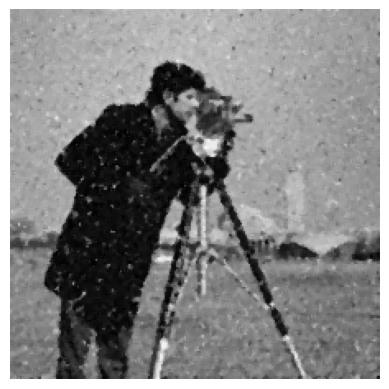

In [19]:
im_smoothed = median_filter(im, size=3)
print(im_smoothed)
plt.imshow(im_smoothed, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

## Part D

Based on the equation presented for the derivative of an image in slide 18, create a 3x3 filter to calculate it using `filter_2d`.

*Hint*: Focus on the derivative along one of the axis only. There will just be 2 non-zero elements in the kernel.


In [27]:
derivative_kernel = np.array([
    [0, 0, 0],
    [-0.5, 0, 0.5], # along x axis
    [0, 0, 0],
])

Apply this kernel to the following image. Can we somehow reduce the effect of noise on the result?

(-0.5, 255.5, 255.5, -0.5)

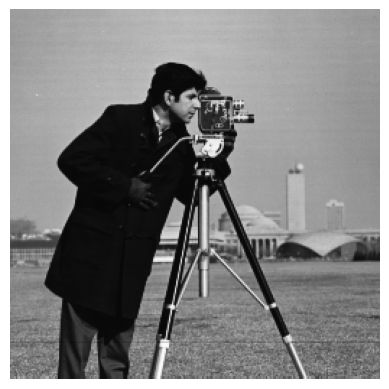

In [22]:
im = cv2.imread('images/Q3/cameraman_noisy.png')
plt.imshow(im)
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 255.5, 255.5, -0.5)

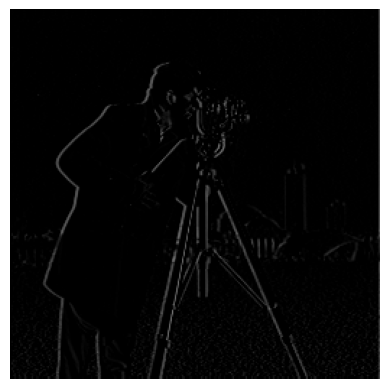

In [28]:
im_smoothed = filter_2d(im, derivative_kernel)
plt.imshow(im_smoothed)
plt.axis('off')

# Q4

In [14]:
def psnr(original, noisy):
    """
    Calculating Peak signal to noise ratio.

    ----------
    parameters:
        original : numpy 2D array, representing a original image.
        noisy : numpy 2D array, representing a noisy image.
    
    return:
        PSNR value
    """
    mse = np.mean((original - noisy) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    psnr_value = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
    return psnr_value

In [25]:
def denoise_image(image):
    """
    Denoises the input image.
    ----------
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result denoised image.   
    """

    denoised = image.copy()
    
    height = denoised.shape[0]
    width = denoised.shape[1]
    
    # Convert to freq domain
    denoised = np.fft.fft2(denoised)
    
    # Remove 80% of middle freqs and keep 10% of beginning and 10% of ending freqs (because of circularity of freqs)
    keep_ratio = 0.1
    denoised[int(height * keep_ratio):int(height * (1 - keep_ratio))] = 0
    denoised[:, int(width * keep_ratio):int(width * (1 - keep_ratio))] = 0
    
    # Convert back to space domain
    denoised = np.fft.ifft2(denoised).real
    return denoised

In [19]:
def f(x,y):
  return np.sin((1/2)*np.pi*x)+np.cos((1/3)*np.pi*y)

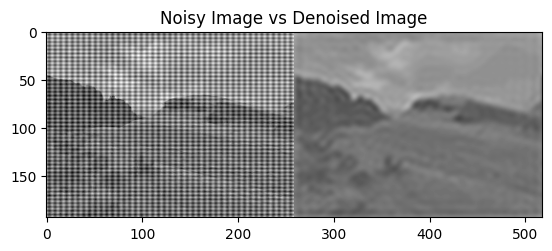

PSNR between noisy image and original image =  8.122255096865844
PSNR between denoised image and original image =  24.804180799257377


In [31]:
original_image = cv2.imread("images/Q4/original_image.png",0)

X,Y = original_image.shape
noise = np.zeros((X,Y))
for i in range(X):
  for j in range(Y):
    noise[i,j] = f(i,j)*100

noisy_image = original_image + noise

"""plt.imshow(noisy_image, cmap="gray")
plt.title("Noisy Image")
plt.show()"""

denoised_image = denoise_image(noisy_image)
res = np.hstack((noisy_image, denoised_image)) #stacking images side-by-side
plt.imshow(res, cmap="gray")
plt.title("Noisy Image vs Denoised Image")
plt.show()
cv2.imwrite('denoised_by_fft.png', res)

print("PSNR between noisy image and original image = ",
      psnr(original_image,noisy_image))
print("PSNR between denoised image and original image = ",
      psnr(original_image,denoised_image))
